<a href="https://colab.research.google.com/github/Stevo-01/ANN-Tensorflow/blob/master/ANN_Model_to_predict_ice_cream_sales_using_Temp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

###You own an ice cream business and you want to create a model to predict daily revenue in dollars based on temperature (degC). You decided to build a simple Artificial Neural Network to solve this problem 


##Importing Libraries

In [ ]:
import tensorflow as tf
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## Load Dataset
sales_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/TensorFlow Practical Datasets/SalesData.csv')

In [ ]:
sales_df.head(5)

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [ ]:
sales_df.tail(10)

,Temperature,Revenue
490,23.824922,584.399945
491,34.472169,809.352520
492,23.056214,552.819351
493,14.931506,377.430928
494,25.112066,571.434257
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [ ]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [ ]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


###Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


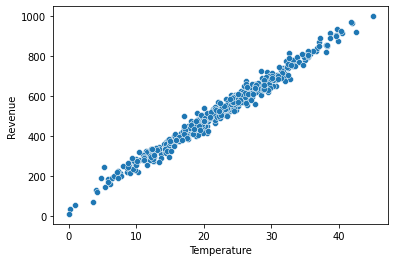

In [ ]:
sns.scatterplot(sales_df['Temperature'], sales_df['Revenue'])

###Testing & Training

In [ ]:
X_train = sales_df['Temperature']
y_train = sales_df['Revenue']

###Build Model & Train

In [ ]:
X_train.shape 

(500,)

In [ ]:
y_train.shape 

(500,)

In [ ]:
## Using inbuilt Keras
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=1, input_shape = [1]))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## Compiling Model

In [ ]:
## Compiling Using Optimizer
model.compile(optimizer= tf.keras.optimizers.Adam(0.1), loss = 'mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 1000)

Epoch 1/1000
16/16 [==============================] - 0s 2ms/step - loss: 277767.5000
Epoch 2/1000
16/16 [==============================] - 0s 1ms/step - loss: 238272.5625
Epoch 3/1000
16/16 [==============================] - 0s 1ms/step - loss: 203063.3750
Epoch 4/1000
16/16 [==============================] - 0s 2ms/step - loss: 171974.7969
Epoch 5/1000
16/16 [==============================] - 0s 2ms/step - loss: 144280.8125
Epoch 6/1000
16/16 [==============================] - 0s 1ms/step - loss: 120135.3359
Epoch 7/1000
16/16 [==============================] - 0s 1ms/step - loss: 99532.8828
Epoch 8/1000
16/16 [==============================] - 0s 1ms/step - loss: 82009.1719
Epoch 9/1000
16/16 [==============================] - 0s 1ms/step - loss: 66711.4688
Epoch 10/1000
16/16 [==============================] - 0s 1ms/step - loss: 54164.9922
Epoch 11/1000
16/16 [==============================] - 0s 1ms/step - loss: 43513.9414
Epoch 12/1000
16/16 [==============================] - 0s

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

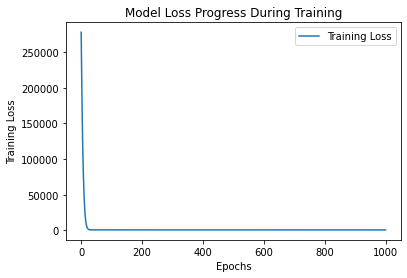

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

In [ ]:
model.get_weights()

[array([[21.417194]], dtype=float32), array([44.80837], dtype=float32)]

In [ ]:
#Use the trained model to perform prediction
Temp = 80
Revenue = model.predict([Temp])
print('Revenue Prediction Using Trained ANN =', Revenue)

Revenue Prediction Using Trained ANN = [[1758.1838]]


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

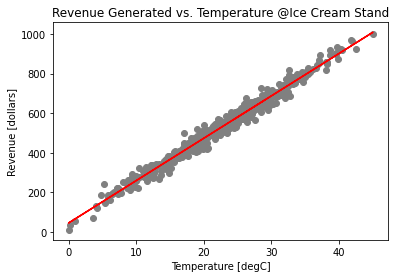

In [ ]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, model.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')

## Confirming Our Model Using Regression Kit in Scikit *Learn*

In [ ]:
X_train = X_train.values.reshape(-1,1)

In [ ]:
X_train.shape

(500, 1)

In [ ]:
y_train = y_train.values.reshape(-1,1)

In [ ]:
y_train.shape

(500, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True) #If we set this to False it means we are forcing the model through the origin, which will set y to 0
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Linear Model Coeff(m)', regressor.coef_)
print('Linear Model Coeff(b)', regressor.coef_)

Linear Model Coeff(m) [[21.44362551]]
Linear Model Coeff(b) [[21.44362551]]


Text(0.5, 1.0, 'Revenue Generated vs. Temperature @Ice Cream Stand')

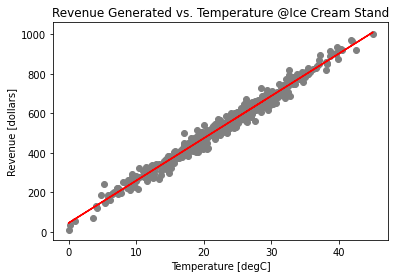

In [ ]:
plt.scatter(X_train, y_train, color = 'gray')
plt.plot(X_train, regressor.predict(X_train), color = 'red')
plt.ylabel('Revenue [dollars]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature @Ice Cream Stand')

## From the above model, it is possible to predict our revenue using Temparature by passing Temp into the model and run. And by using Scikits learn we are able to confirm that this Model is correct 